# Import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [15, 6]

In [4]:
#sns.set_theme()

# Check Recordings

In [5]:
import tvh_check_upcoming_recs as check

## Load DataFrame

In [6]:
df = check.get_df()
df

ATTRIBUTES,Title,Channel,Start,Stop
INDEX,,,,
0,...Moi non plus!,Noovo,2023-07-27 19:30:00,2023-07-27 20:00:00
1,Mixed Baggage,City,2023-07-28 03:00:00,2023-07-28 05:00:00
2,Les looney tunes,TVA,2023-07-28 05:30:00,2023-07-28 06:00:00
3,Work It Out Wombats!,PBS,2023-07-28 11:30:00,2023-07-28 12:00:00
4,L'échappée,TVA,2023-07-28 13:00:00,2023-07-28 14:00:00
5,Work It Out Wombats!,PBS,2023-07-29 09:00:00,2023-07-29 09:30:00
6,Jumper,CTV,2023-07-29 13:00:00,2023-07-29 15:00:00
7,En tout cas,TVA,2023-07-29 13:30:00,2023-07-29 14:00:00
8,Agence de renseignement,TVA,2023-07-29 16:01:00,2023-07-29 18:00:00


## Analysis

### Smaller Data

In [7]:
##### TEMP for development
#df = df.head(10)
#df = df.iloc[1:4]
#df.reset_index(drop=True, inplace=True)
#df

In [8]:
df.loc[0, 'Stop']

Timestamp('2023-07-27 20:00:00')

In [9]:
df.loc[0, 'Stop'] - df.loc[0, 'Start']

Timedelta('0 days 00:30:00')

In [10]:
type(_)

pandas._libs.tslibs.timedeltas.Timedelta

### Fudged Data

In [11]:
#df = pd.DataFrame({'Start': [ 0, 0, 1, 2, 3, 4, 5, 6, 6],
#                   'Stop' : [ 1, 4, 2, 3, 4, 8, 6, 7, 8]})
#df.sort_values(by=['Start', 'Stop'], ascending=[True, False], inplace=True, ignore_index=True)
#df.rename_axis('ATTRIBUTES', axis='columns', inplace=True)
#df.rename_axis('INDEX', axis='index', inplace=True)
#df

### Graph

In [12]:
def plot_rec(df):
    offset = df['Start'].min()
    x1 = df['Start'] #- offset
    x2 = df['Stop'] #- offset
    plt.barh(left=x1, width=x2-x1, y=df.index, height=.8)
    plt.grid()

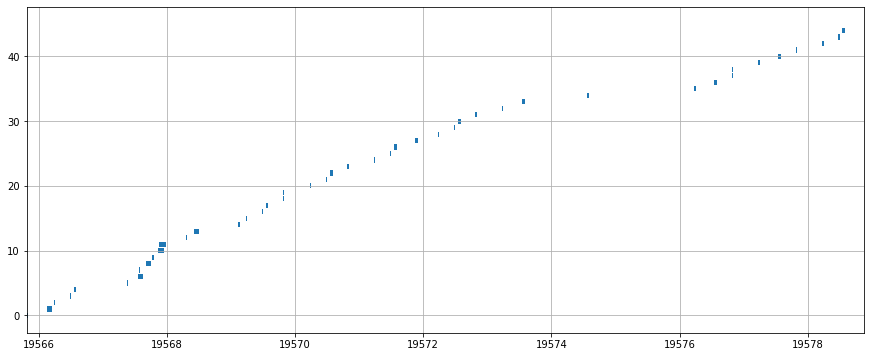

In [13]:
plot_rec(df)

In [14]:
start_c = df['Start'].to_numpy()
stop_c = df['Stop'].to_numpy()
start_r = df['Start'].to_numpy()[:, np.newaxis]
stop_r = df['Stop'].to_numpy()[:, np.newaxis]

In [15]:
# df Analysis

# ref rec:          ************                   : comp overlap ref?
# comp rec:   -------                              : n
#              ----------                          : y
#              -----------------------             : y
#                   ------------                   : y
#                      ------                      : y
#                         ------------             : y
#                              ----------------    : n
#

dfa = pd.DataFrame(((start_c < stop_r) & (stop_c > start_r)) * 1)
dfa.rename_axis('INDEX', axis='columns', inplace=True)
dfa.rename_axis('INDEX', axis='index', inplace=True)
dfa

INDEX,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
INDEX,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dfa.sum()

INDEX
0     1
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     1
9     1
10    2
11    2
12    1
13    1
14    1
15    1
16    1
17    1
18    2
19    2
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    2
38    2
39    1
40    1
41    1
42    1
43    1
44    1
45    1
dtype: int64

In [17]:
dfr = df.copy()
dfr['NbTunerRequired'] = dfa.sum()
dfr

ATTRIBUTES,Title,Channel,Start,Stop,NbTunerRequired
INDEX,,,,,
0,...Moi non plus!,Noovo,2023-07-27 19:30:00,2023-07-27 20:00:00,1
1,Mixed Baggage,City,2023-07-28 03:00:00,2023-07-28 05:00:00,1
2,Les looney tunes,TVA,2023-07-28 05:30:00,2023-07-28 06:00:00,1
3,Work It Out Wombats!,PBS,2023-07-28 11:30:00,2023-07-28 12:00:00,1
4,L'échappée,TVA,2023-07-28 13:00:00,2023-07-28 14:00:00,1
5,Work It Out Wombats!,PBS,2023-07-29 09:00:00,2023-07-29 09:30:00,1
6,Jumper,CTV,2023-07-29 13:00:00,2023-07-29 15:00:00,2
7,En tout cas,TVA,2023-07-29 13:30:00,2023-07-29 14:00:00,2
8,Agence de renseignement,TVA,2023-07-29 16:01:00,2023-07-29 18:00:00,1


In [18]:
dfr[dfr['NbTunerRequired'] > 2]

ATTRIBUTES,Title,Channel,Start,Stop,NbTunerRequired
INDEX,,,,,


In [19]:
check.analyze_df(df)

ATTRIBUTES,Title,Channel,Start,Stop,NbTunerRequired
INDEX,,,,,


## All-in-one

In [20]:
check.analyze_df(check.get_df())

ATTRIBUTES,Title,Channel,Start,Stop,NbTunerRequired
INDEX,,,,,
